In [2]:
import psycopg2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

import seaborn as sns
import datetime

## Clean Catcher Datasets

In [5]:
#dfcat1 (catchers who played btwn 30 to 100 gms) = clutch_cat_30.csv
#dfcat2 (catchers who played at least 100 gms) = clutch_cat_100.csv
#dfcat3 (outfielder who made atleast 5 allstar gms) = allstr_clutch_cat.csv

## Data Ingestion

In [3]:
import psycopg2 as p2
conn = p2.connect(database = 'player_stats', user ='baseball_master', password = 'georgetowndata', 
                  host = 'georgetown-baseball.cnfqonxqdbry.us-east-1.rds.amazonaws.com', 
                  port = '5432')

## Data sets created

In [17]:
#dfcat1 = pd.read_csv('clutch_cat_30.csv', index_col=0)
#dfcat2 = pd.read_csv('clutch_cat_100.csv', index_col=0)
dfcat3 = pd.read_csv('allstr_clutch_cat.csv', index_col=0)

In [18]:
#Clear data set of NaN values
#dfcat1 = dfcat1.fillna(0)
#dfcat2 = dfcat2.fillna(0)
dfcat3 = dfcat3.fillna(0)

In [22]:
#dfcat1.head()
#dfcat2.head()
dfcat3.head()

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G_x,nameFirst,nameLast,birthYear,...,R,HR,RBI,AVG,1B,TB,SLG,OBP,OPS,RC
0,1950.0,berrayo01,622.0,0.015356,-0.016478,C,148.0,Yogi,Berra,1925.0,...,116.0,28.0,124.0,0.321608,156.0,216.0,0.361809,0.382622,0.744431,82.646341
1,1950.0,lollash01,316.0,0.017708,-0.004316,C,109.0,Sherm,Lollar,1924.0,...,55.0,13.0,65.0,0.280303,86.0,130.0,0.328283,0.391026,0.719308,50.833333
2,1950.0,camparo01,504.0,0.014228,-0.016401,C,123.0,Roy,Campanella,1921.0,...,70.0,31.0,89.0,0.281465,101.0,139.0,0.318078,0.364372,0.682450,50.647773
3,1951.0,berrayo01,583.0,0.013528,-0.018051,C,141.0,Yogi,Berra,1925.0,...,92.0,27.0,88.0,0.294333,138.0,176.0,0.321755,0.350168,0.671923,61.629630
4,1951.0,camparo01,584.0,0.016612,-0.018750,C,140.0,Roy,Campanella,1921.0,...,90.0,33.0,108.0,0.324752,130.0,196.0,0.388119,0.393238,0.781357,77.074733


## Summary Stats

### Catchers who played at least 30 games

In [6]:
dfcat1[["AVG", "HR", "H", "TB", "SLG", "OPS", "OBP","BB","RC"]].describe()

,AVG,HR,H,TB,SLG,OPS,OBP,BB,RC
count,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000
mean,0.234374,4.342857,43.946771,51.291977,0.273535,0.575835,0.302300,17.367515,16.077750
std,0.047785,4.369112,24.266828,28.398056,0.058084,0.105389,0.054413,12.674404,9.955308
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.211111,1.000000,27.000000,31.000000,0.244541,0.523788,0.274729,9.000000,8.944272
50%,0.236364,3.000000,40.000000,47.000000,0.277228,0.581097,0.304688,15.000000,14.117647
75%,0.261084,6.000000,58.000000,68.000000,0.307129,0.636625,0.333333,23.000000,21.323339
max,1.000000,33.000000,166.000000,185.000000,1.000000,2.000000,1.000000,125.000000,68.981308


### Catchers who played atleast 100 games

In [13]:
dfcat2[["AVG", "HR", "H", "TB", "SLG", "OPS", "OBP","BB","RC"]].describe()

,AVG,HR,H,TB,SLG,OPS,OBP,BB,RC
count,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000
mean,0.256577,11.072029,106.650660,124.837935,0.300252,0.624454,0.324203,39.208884,40.975190
std,0.028756,6.879603,25.931709,31.128014,0.037164,0.065633,0.034755,17.560050,12.901302
min,0.166667,0.000000,25.000000,30.000000,0.179487,0.422730,0.213376,9.000000,9.461538
25%,0.236593,6.000000,88.000000,103.000000,0.274725,0.582006,0.300781,26.000000,31.923077
50%,0.256098,10.000000,105.000000,122.000000,0.300283,0.624120,0.322251,36.000000,39.823647
75%,0.275943,15.000000,124.000000,145.000000,0.324324,0.667752,0.347945,49.000000,48.542553
max,0.337945,43.000000,191.000000,227.000000,0.418972,0.845118,0.426230,122.000000,90.342954


### All Star Catchers 

In [15]:
dfcat3[["AVG", "HR", "H", "TB", "SLG", "OPS", "OBP","BB","RC"]].describe()

,AVG,HR,H,TB,SLG,OPS,OBP,BB,RC
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.279008,18.766497,134.152284,155.218274,0.323143,0.669292,0.346149,47.208122,54.341136
std,0.031201,9.185520,31.167539,37.164116,0.039275,0.066573,0.032485,16.255057,16.066033
min,0.190476,0.000000,4.000000,6.000000,0.231959,0.519325,0.270208,3.000000,1.750000
25%,0.259524,12.000000,112.000000,130.000000,0.295652,0.623543,0.325792,36.000000,42.938497
50%,0.279843,19.000000,136.000000,155.000000,0.322820,0.668919,0.347826,47.000000,53.700000
75%,0.300261,24.000000,155.000000,182.000000,0.349817,0.713395,0.368522,57.000000,64.860759
max,0.365201,45.000000,201.000000,236.000000,0.420650,0.864544,0.443894,100.000000,100.056872


## Data Exploration with Seaborn  

#### Leverage Pairplots to id trends in the data

In [17]:
import seaborn as sns
import numpy as np
%matplotlib inline

In [12]:
### Measure relationship btwn key stats [AVG, TB, HR, OPS, OBP, SLG, BB, 1B, 2B, 3B, RC]

### Cutfielders who played at least 30 games

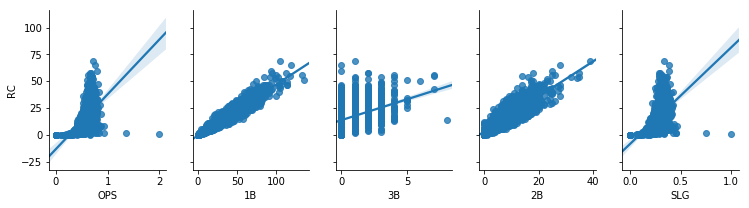

In [11]:
sns.pairplot(dfcat1, x_vars = ['OPS','1B','3B','2B','SLG'], y_vars = 'RC', height = 3, aspect = 0.7, kind = 'reg')

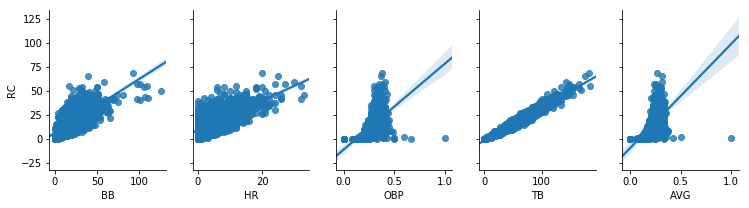

In [12]:
sns.pairplot(dfcat1, x_vars = ['BB','HR','OBP','TB','AVG'], y_vars = 'RC', height = 3, aspect = 0.7, kind = 'reg')

### Catchers who played at least 100 games

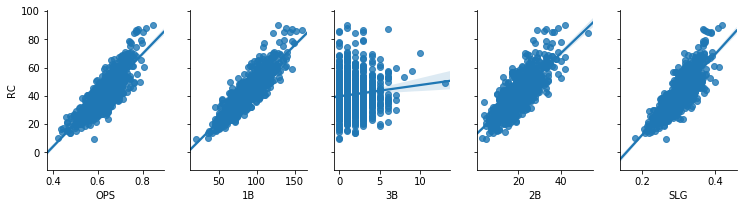

In [19]:
sns.pairplot(dfcat2, x_vars = ['OPS','1B','3B','2B','SLG'], y_vars = 'RC', height = 3, aspect = 0.7, kind = 'reg')

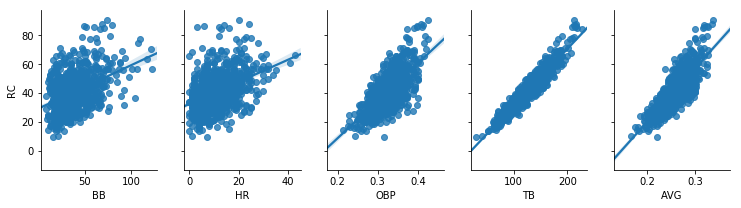

In [18]:
sns.pairplot(dfcat2, x_vars = ['BB','HR','OBP','TB','AVG'], y_vars = 'RC', height = 3, aspect = 0.7, kind = 'reg')

### All Star Catchers

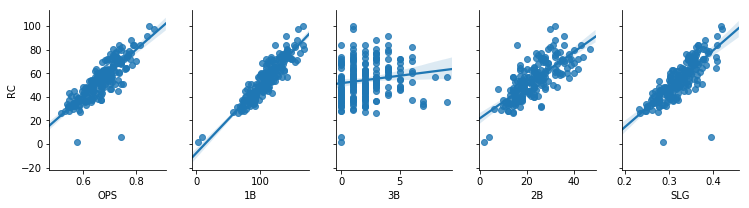

In [24]:
sns.pairplot(dfcat3, x_vars = ['OPS','1B','3B','2B','SLG'], y_vars = 'RC', height = 3, aspect = 0.7, kind = 'reg')

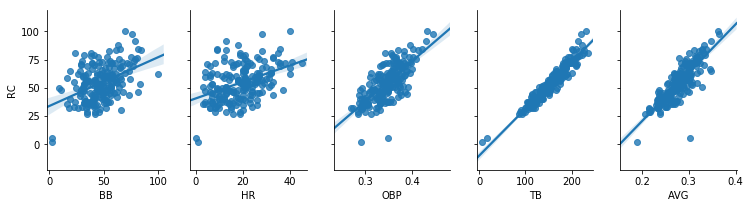

In [25]:
sns.pairplot(dfcat3, x_vars = ['BB','HR','OBP','TB','AVG'], y_vars = 'RC', height = 3, aspect = 0.7, kind = 'reg')

## Machine Learning: Which Features can predict Runs Created (response)? 

### Catchers who played at least 30 games

#### Create X = features and y = response

In [19]:
#What are the features? - AVG, HR, OPS, SLG, BB, 1B, 2B, 3B, H
#What is the response? - Runs Created

features = ['AVG', 'TB', 'HR', 'OPS', 'OBP', 'SLG', 'BB', '1B','2B','3B']
#response = 'RC' (Runs Created)

X = dfcat1[features]
y = dfcat1['RC']

#### Splitting X and y into training and testing sets

In [27]:
#Evaluate the Models
#from sklearn.cross.validation import train_test_split (Doesnt work)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4)

In [28]:
#default split is 75% for training and 25% for test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1916, 10)
(639, 10)
(1916,)
(639,)


#### Linear Regression to train Model to learn

In [33]:
#import model
from sklearn.linear_model import LinearRegression

#instantiate
linreg = LinearRegression()

#fit the model to the training data(learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
### Interpreting model coefficents

#### Making Predictions

In [34]:
#make predictions on the X test data
y_pred = linreg.predict(X_test)

In [35]:
from sklearn import metrics

#### Root-Mean Sample Squared Error (Difference btwn Predicted and Test values)

In [36]:
#Catchers with at least 30 gms
#Computing the RMSE for Runs Created
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.464973395459441


In [ ]:
#dfcat1 = 1.46  with all 10 features (Catchers with atleast 30 gms)

### Catchers who played at least 100 games

#### Create X = features and y = response

In [37]:
features = ['AVG', 'TB', 'HR', 'OPS', 'OBP', 'SLG', 'BB', '1B','2B','3B']
#response = 'RC' (Runs Created)

X = dfcat2[features]
y = dfcat2['RC']

#### Splitting X and y into training and testing sets

In [38]:
#Evaluate the Models
#from sklearn.cross.validation import train_test_split (Doesnt work)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4)

In [39]:
#default split is 75% for training and 25% for test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(624, 10)
(209, 10)
(624,)
(209,)


#### Linear Regression to train Model to learn

In [40]:
#import model
from sklearn.linear_model import LinearRegression

#instantiate
linreg = LinearRegression()

#fit the model to the training data(learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Making Predictions

In [41]:
#make predictions on the X test data
y_pred = linreg.predict(X_test)

In [42]:
from sklearn import metrics

#### Root-Mean Sample Squared Error (Difference btwn Predicted and Test values)

In [136]:
#Catchers with atleast 100 games
#Computing the RMSE for Runs Created
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.5817736025348457


### All Star Catchers

#### Create X = features and y = response

In [20]:
features = ['AVG', 'TB', 'HR', 'OPS', 'OBP', 'SLG', 'BB', '1B','2B','3B']
#response = 'RC' (Runs Created)

X = dfcat3[features]
y = dfcat3['RC']

#### Splitting X and y into training and testing sets

In [44]:
#Evaluate the Models
#from sklearn.cross.validation import train_test_split (Doesnt work)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4 )

In [45]:
#default split is 75% for training and 25% for test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(147, 10)
(50, 10)
(147,)
(50,)


#### Linear Regression to train Model to learn

In [46]:
#import model
from sklearn.linear_model import LinearRegression

#instantiate
linreg = LinearRegression()

#fit the model to the training data(learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Making Predictions

In [47]:
#make predictions on the X test data
y_pred = linreg.predict(X_test)

In [48]:
from sklearn import metrics

#### Root-Mean Sample Squared Error (Difference btwn Predicted and Test values)

In [49]:
#All Star Catchers.
#Computing the RMSE for Runs Created
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.2824604206075192


## Feature selection - Which are the underperforming features?

### Catchers with atleast 30 games

#### Yellowbrick's Feature Rank Visualizer

In [50]:
features = ['AVG', 'TB', 'HR', 'OPS', 'OBP', 'SLG', 'BB', '1B','2B','3B']
#response = 'RC' (Runs Created)
X = dfcat1[features]
y = ['RC']

In [51]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(features = features, algorithm ='shapiro')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


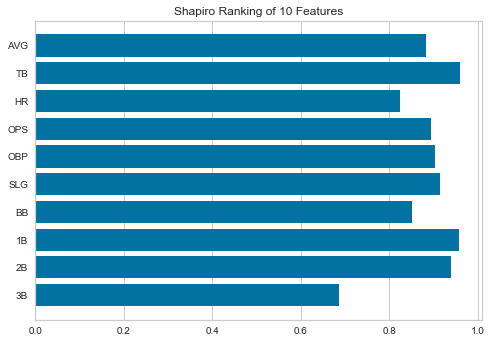

In [52]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

In [ ]:
# Features [HR, 3B, BB, AVG] ranked the worst

#### Yellowbrick's Feature Importance to futher verify Feature Importance

In [53]:
#Outfielders with atleast 30 games
#convert y from float to integer
y = dfcat1.RC.astype(int) 

In [54]:
#Outfielders with atleast 30 games
#set X value for all 10 features
X = dfcat1[features]

In [55]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances
%matplotlib inline

In [56]:
fig = plt.figure()
ax = fig.add_subplot()
#ax = ax

<Figure size 432x288 with 0 Axes>

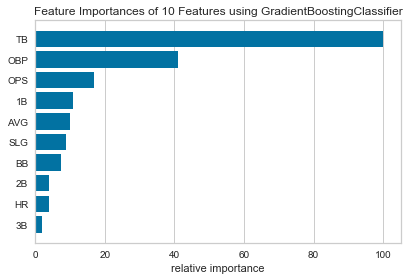

In [57]:
# Infielders with atleast 30 gms
# Features TB, OBP, and OPS are the most important
viz = FeatureImportances(GradientBoostingClassifier(), ax = ax)
viz.fit(X,y)
viz.poof()

#### Yellowbrick's Feature Covariance 2D Rank heat map

In [58]:
#reset value of y to y = dfin1['RC']
y = dfcat1['RC']
from yellowbrick.features import Rank2D
visualizer = Rank2D(features=features, algorithm = 'covariance')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


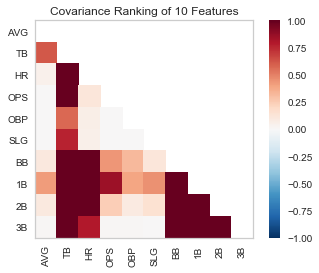

In [59]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

### Catchers with atleast 100 games

#### Yellowbrick's Feature Rank Visualizer

In [61]:
features = ['AVG', 'TB', 'HR', 'OPS', 'OBP', 'SLG', 'BB', '1B','2B','3B']
#response = 'RC' (Runs Created)
X = dfcat2[features]
y = ['RC']

In [62]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(features = features, algorithm ='shapiro')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


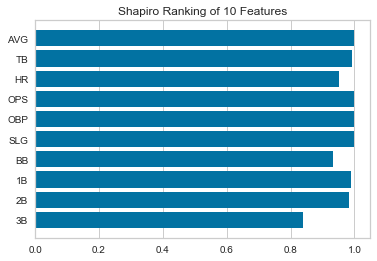

In [63]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

#### Yellowbrick's Feature Importance to futher verify Feature Importance

In [64]:
#Catchers with atleast 100 games
#convert y from float to integer
y = dfcat2.RC.astype(int) 

In [65]:
X = dfcat2[features]

In [66]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances
%matplotlib inline

In [67]:
fig = plt.figure()
ax = fig.add_subplot()
#ax = ax

<Figure size 432x288 with 0 Axes>

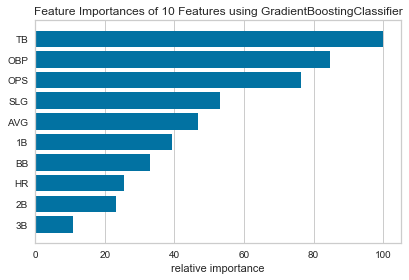

In [68]:
# Features TB, OBP, and OPS are the most important
viz = FeatureImportances(GradientBoostingClassifier(), ax = ax)
viz.fit(X,y)
viz.poof()

#### Yellowbrick's Feature Covariance 2D Rank heat map

In [69]:
#reset value of y to y = dfcat2['RC']
y = dfcat2['RC']
from yellowbrick.features import Rank2D
visualizer = Rank2D(features=features, algorithm = 'covariance')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


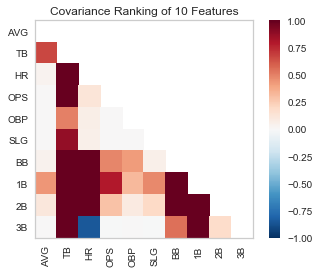

In [70]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

### Allstar Catchers

#### Yellowbrick's Feature Rank Visualizer

In [71]:
features = ['AVG', 'TB', 'HR', 'OPS', 'OBP', 'SLG', 'BB', '1B','2B','3B']
#response = 'RC' (Runs Created)
X = dfcat3[features]
y = ['RC']

In [72]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(features = features, algorithm ='shapiro')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


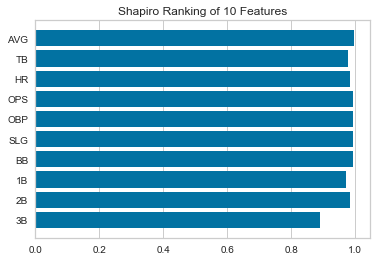

In [73]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

#### Yellowbrick's Feature Importance to futher verify Feature Importance

In [128]:
#convert y from float to integer
y = dfcat3.RC.astype(int) 

In [75]:
X = dfcat3[features]

In [76]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances
%matplotlib inline

In [77]:
fig = plt.figure()
ax = fig.add_subplot()
#ax = ax

<Figure size 432x288 with 0 Axes>

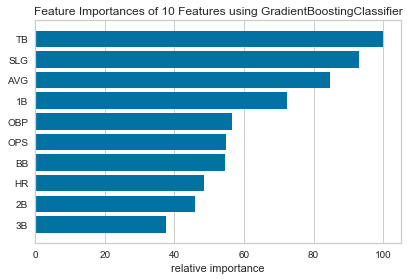

In [78]:
# Features TB, OBP, and OPS are the most important
viz = FeatureImportances(GradientBoostingClassifier(), ax = ax)
viz.fit(X,y)
viz.poof()

#### Yellowbrick's Feature Covariance 2D Rank heat map

In [21]:
#reset value of y to y = dfcat3['RC']
y = dfcat3['RC']
from yellowbrick.features import Rank2D
visualizer = Rank2D(features=features, algorithm = 'covariance')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


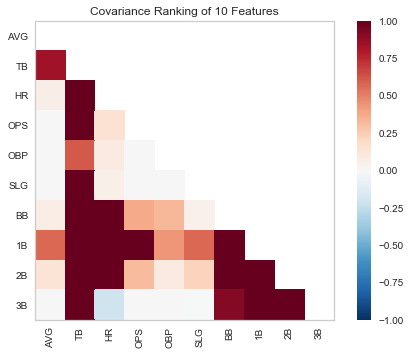

In [22]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

## Prediction and Error Plotting

### Catchers with atleast 30 games

In [81]:
#Reset X and y values
features = ['AVG', 'TB', 'HR', 'OPS', 'OBP', 'SLG', 'BB', '1B','2B','3B']
X = dfcat1[features]
y = dfcat1['RC']

#### Ridge Regression - R2 Score

In [82]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [83]:

X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)

#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.9716847885753597


In [ ]:
#score to high = overfitted. Must remove features and add noise

In [84]:
#removed TB, OPS, OBP, SLG, '2B'
features = ['AVG','HR','BB', '1B','3B']

In [85]:
X= dfcat1[features]

In [86]:
X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)
#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.9221399032267684


In [ ]:
#Retry with adding noise to features

In [87]:
#add noise to features
features = ['AVG','HR','BB','1B','3B','W', 'G_x', 'birthYear']

In [88]:
#Re-try with removed features
X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)
#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.9221399032267684


#### Lasso Regression -R2 Score

In [89]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [90]:
#Re-set X with reduced features
features = ['AVG','HR','BB', '1B','3B']
X= dfcat1[features]
y = dfcat1['RC']

In [91]:

X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)
#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.9221399032267684


### Re-measure importance of reduced feautures

In [125]:
features = ['AVG','HR','BB', '1B','3B']
X= dfcat1[features]
y = dfcat1['RC']

In [126]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(features = features, algorithm ='shapiro')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


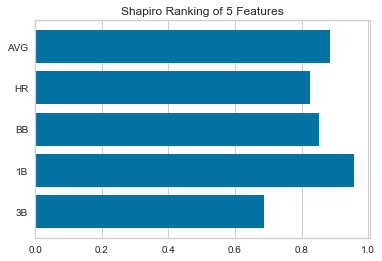

In [127]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

In [134]:
#convert y from float to integer
y = dfcat1.RC.astype(int) 

In [135]:
X = dfcat1[features]

In [136]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances
%matplotlib inline

In [137]:
fig = plt.figure()
ax = fig.add_subplot()
#ax = ax

<Figure size 432x288 with 0 Axes>

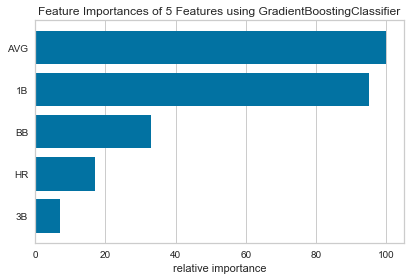

In [138]:
# Features TB, OBP, and OPS are the most important
viz = FeatureImportances(GradientBoostingClassifier(), ax = ax)
viz.fit(X,y)
viz.poof()

In [142]:
#reset value of y to y = dfcat1['RC']
y = dfcat1['RC']
from yellowbrick.features import Rank2D
visualizer = Rank2D(features=features, algorithm = 'covariance')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


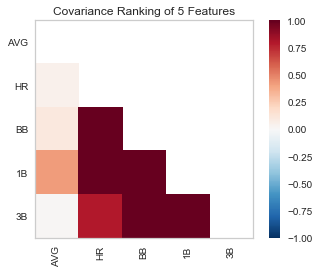

In [143]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

## Data Visualization

### Outfielders with at least 30 gms

#### Visualize Plot Error

In [93]:
#Train Model again

from sklearn.model_selection import train_test_split
data = dfcat1
features = ['AVG','HR','BB', '1B','3B']
X = dfcat1[features]
y = dfcat1['RC']


In [94]:
#Create the train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Ridge Regression R2 Score

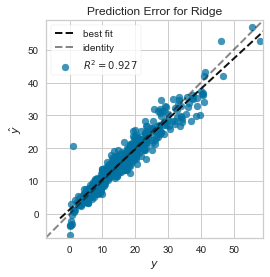

In [95]:
from sklearn.linear_model import Ridge

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
Ridge = Ridge()
visualizer = PredictionError(Ridge)#, ##size = (1080,720), legend_size = 3))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

#### Lasso Regression R2 Score

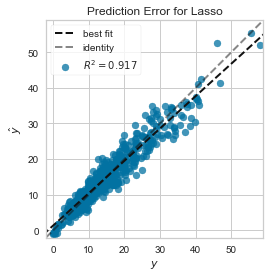

In [96]:
from sklearn.linear_model import Lasso

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
Lasso = Lasso()
visualizer = PredictionError(Lasso)#, ##size = (1080,720), legend_size = 3))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

#### Ridge - Residual Plots

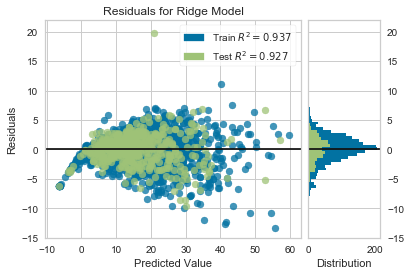

In [97]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

Ridge = Ridge()
visualizer = ResidualsPlot(Ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()
 

#### Lasso - Resdiual Plots

In [98]:
from sklearn.linear_model import Lasso
from yellowbrick.regressor import ResidualsPlot

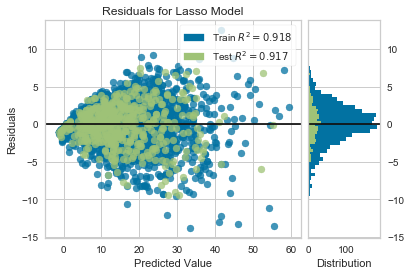

In [99]:
Lasso = Lasso()
visualizer = ResidualsPlot(Lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

## Prediction and Error Plotting

### Catchers with atleast 100 games

In [100]:
#Reset X and y values
features = ['AVG','HR','BB', '1B','3B']
X = dfcat2[features]
y = dfcat2['RC']

#### Ridge Regression -R2 Score

In [101]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [102]:

X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)

#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.8257182433709824


#### Lasso Regression -R2 Score

In [103]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [104]:

X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)
#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.8257182433709824


### Re-measure importance of reduced feautures

In [156]:
features = ['AVG','HR','BB', '1B','3B']
X= dfcat2[features]
y = dfcat2['RC']

In [157]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(features = features, algorithm ='shapiro')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


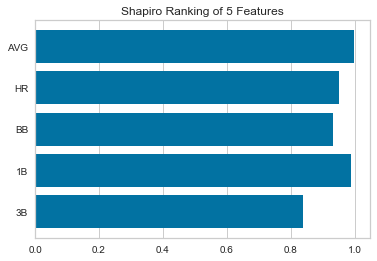

In [158]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

In [159]:
#convert y from float to integer
y = dfcat2.RC.astype(int) 

In [160]:
X = dfcat2[features]

In [161]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances
%matplotlib inline

In [162]:
fig = plt.figure()
ax = fig.add_subplot()
#ax = ax

<Figure size 432x288 with 0 Axes>

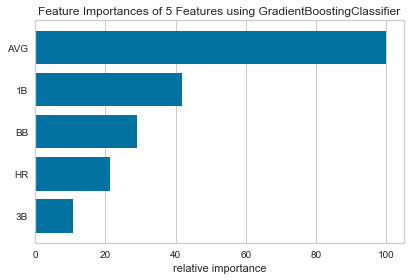

In [163]:
# Features TB, OBP, and OPS are the most important
viz = FeatureImportances(GradientBoostingClassifier(), ax = ax)
viz.fit(X,y)
viz.poof()

In [164]:
#reset value of y to y = dfcat2['RC']
y = dfcat2['RC']
from yellowbrick.features import Rank2D
visualizer = Rank2D(features=features, algorithm = 'covariance')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


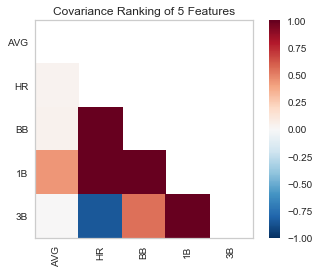

In [165]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

## Data Visualization

### Outfielders with at least 100 gms

#### Visualize Plot Error

In [105]:
#Train Model again

from sklearn.model_selection import train_test_split
data = dfcat2
features = ['AVG','HR','BB','1B','3B']
X = dfcat2[features]
y = dfcat2['RC']

In [106]:
#Create and train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Ridge Regression R2 Score

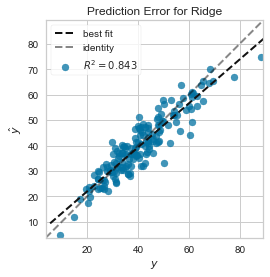

In [107]:
from sklearn.linear_model import Ridge

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
Ridge = Ridge()
visualizer = PredictionError(Ridge)#, ##size = (1080,720), legend_size = 3))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

#### Lasso Regression R2 Score

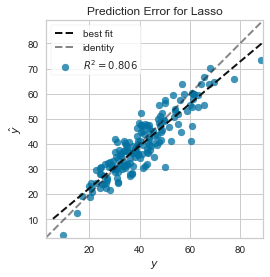

In [108]:
from sklearn.linear_model import Lasso

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
Lasso = Lasso()
visualizer = PredictionError(Lasso)#, ##size = (1080,720), legend_size = 3))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

#### Ridge - Residual Plots

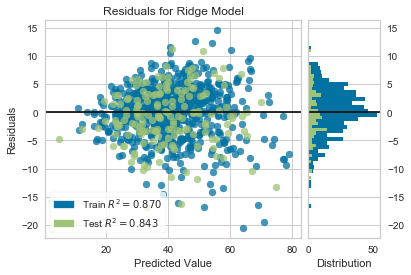

In [109]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

Ridge = Ridge()
visualizer = ResidualsPlot(Ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()
 

#### Lasso - Residual Plots

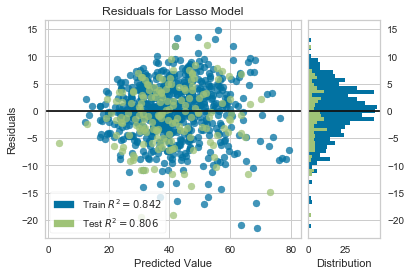

In [110]:
from sklearn.linear_model import Lasso
from yellowbrick.regressor import ResidualsPlot

Lasso = Lasso()
visualizer = ResidualsPlot(Lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

## Prediction and Error Plotting

### All Star Outfielders 

In [111]:
#Reset X and y values
features = ['AVG','HR','BB','1B','3B']
X = dfcat3[features]
y = dfcat3['RC']

#### Ridge Regression - R2 Score

In [112]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [113]:

X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)

#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.7727858184924028


#### Lasso Regression -R2 Score

In [114]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [115]:

X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)
#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.7727858184924028


### Re-measure importance of reduced feautures

In [166]:
features = ['AVG','HR','BB','1B','3B']
X= dfcat3[features]
y = dfcat3['RC']

In [167]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(features = features, algorithm ='shapiro')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


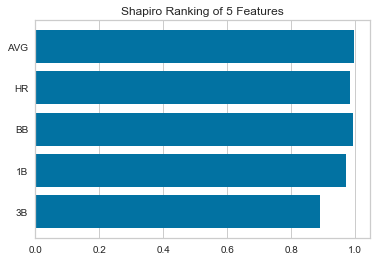

In [168]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

In [169]:
#convert y from float to integer
y = dfcat3.RC.astype(int) 

In [170]:
X = dfcat3[features]

In [171]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances
%matplotlib inline

In [172]:
fig = plt.figure()
ax = fig.add_subplot()
#ax = ax

<Figure size 432x288 with 0 Axes>

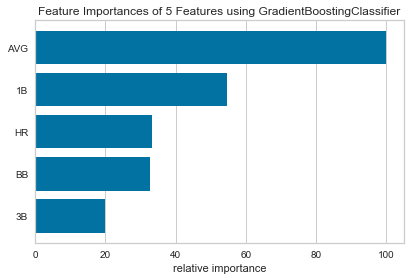

In [173]:
# Features TB, OBP, and OPS are the most important
viz = FeatureImportances(GradientBoostingClassifier(), ax = ax)
viz.fit(X,y)
viz.poof()

In [174]:
#reset value of y to y = dfcat3['RC']
y = dfcat3['RC']
from yellowbrick.features import Rank2D
visualizer = Rank2D(features=features, algorithm = 'covariance')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


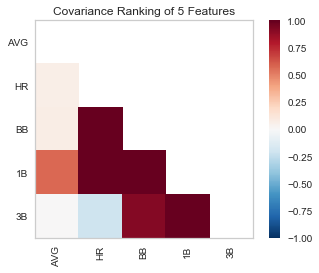

In [175]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

## Data Visualization

### All Star Catchers 

#### Visualize Plot Error

In [116]:
#Train Model again

from sklearn.model_selection import train_test_split
data = dfcat3
features = ['AVG','HR','BB', '1B','3B']
X = dfcat3[features]
y = dfcat3['RC']

In [117]:
#Create and train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Ridge Regression R2 Score

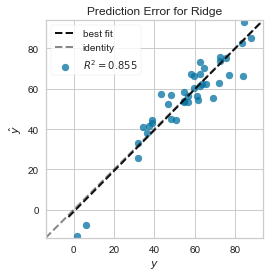

In [118]:
from sklearn.linear_model import Ridge

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
Ridge = Ridge()
visualizer = PredictionError(Ridge)#, ##size = (1080,720), legend_size = 3))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

#### Lasso Regression R2 Score

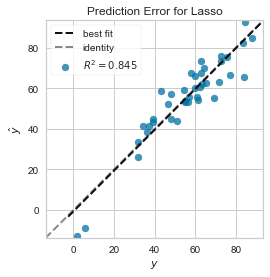

In [119]:
from sklearn.linear_model import Lasso

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
Lasso = Lasso()
visualizer = PredictionError(Lasso)#, ##size = (1080,720), legend_size = 3))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

#### Ridge - Residual Plots

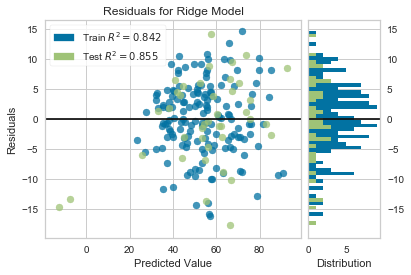

In [120]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

Ridge = Ridge()
visualizer = ResidualsPlot(Ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()
 

#### Lasso - Residual Plots

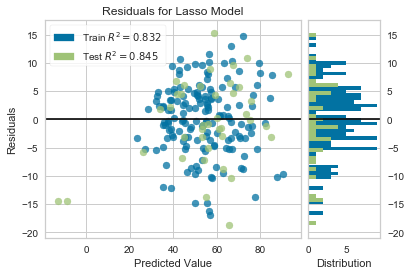

In [121]:
from sklearn.linear_model import Lasso
from yellowbrick.regressor import ResidualsPlot

Lasso = Lasso()
visualizer = ResidualsPlot(Lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()